In [77]:
# Importing the necessary libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Loading the Titanic dataset
train_df = pd.read_csv('C:/Users/User/OneDrive/SEM-3/ML/titanic/train.csv')
test_df = pd.read_csv('C:/Users/User/OneDrive/SEM-3/ML/titanic/test.csv')


In [25]:
# Preprocessing the data
train_df = train_df.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
train_df = train_df.dropna()
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})


In [26]:
test_df = test_df.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
test_df = test_df.dropna()
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

In [56]:
# Splitting the data into training and testing sets
X_train = train_df.drop(['Survived'], axis=1)
y_train = train_df['Survived']

X_test = test_df
y_test = pd.Series([None] * len(X_test))

In [57]:
# Building the logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
# Defining the hyperparameters for grid search
lr_params = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Building the grid search object
lr_grid = GridSearchCV(lr_model, lr_params, cv=5)

# Fitting the grid search object to the data
lr_grid.fit(X_train, y_train)


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [72]:
# Printing the best hyperparameters
print("Best hyperparameters for Logistic Regression: ", lr_grid.best_params_)

Best hyperparameters for Logistic Regression:  {'C': 1, 'penalty': 'l2'}


In [53]:
# Building the random forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [73]:
# Defining the hyperparameters for grid search
rf_params = {'n_estimators': [10, 50, 100, 200], 'max_depth': [1, 5, 10, 20, None]}

# Building the grid search object
rf_grid = GridSearchCV(rf_model, rf_params, cv=5)

# Fitting the grid search object to the data
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 5, 10, 20, None],
                         'n_estimators': [10, 50, 100, 200]})

In [74]:
# Printing the best hyperparameters
print("Best hyperparameters for Random Forest: ", rf_grid.best_params_)

Best hyperparameters for Random Forest:  {'max_depth': 5, 'n_estimators': 10}


In [60]:
# Comparing the performance of the two models
lr_accuracy = accuracy_score(y_train, lr_model.predict(X_train))
rf_accuracy = accuracy_score(y_train, rf_model.predict(X_train))

In [61]:
lr_precision = precision_score(y_train, lr_model.predict(X_train))
rf_precision = precision_score(y_train, rf_model.predict(X_train))


In [62]:
lr_recall = recall_score(y_train, lr_model.predict(X_train))
rf_recall = recall_score(y_train, rf_model.predict(X_train))


In [63]:
lr_f1_score = f1_score(y_train, lr_model.predict(X_train))
rf_f1_score = f1_score(y_train, rf_model.predict(X_train))

In [64]:
print(f"The accuracy of the logistic regression model is {lr_accuracy:.2%}")
print(f"The accuracy of the random forest model is {rf_accuracy:.2%}")

The accuracy of the logistic regression model is 78.85%
The accuracy of the random forest model is 100.00%


In [65]:
print(f"The precision of the logistic regression model is {lr_precision:.2%}")
print(f"The precision of the random forest model is {rf_precision:.2%}")

The precision of the logistic regression model is 76.83%
The precision of the random forest model is 100.00%


In [66]:
print(f"The recall score of the logistic regression model is {lr_recall:.2%}")
print(f"The recall score of the random forest model is {rf_recall:.2%}")

The recall score of the logistic regression model is 68.62%
The recall score of the random forest model is 100.00%


In [67]:
print(f"The f1 score of the logistic regression model is {lr_f1_score:.2%}")
print(f"The f1 score of the random forest model is {rf_f1_score:.2%}")

The f1 score of the logistic regression model is 72.50%
The f1 score of the random forest model is 100.00%


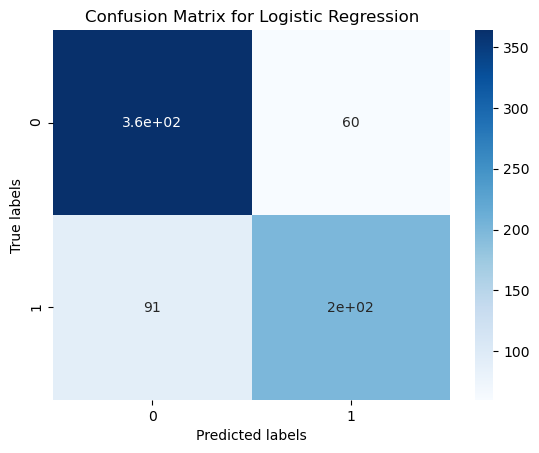

In [78]:
# Plotting the confusion matrix for logistic regression
lr_predictions = lr_model.predict(X_train)
lr_cm = confusion_matrix(y_train, lr_predictions)
sns.heatmap(lr_cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [79]:
# Generating the confusion matrix for random forest
rf_predictions = rf_model.predict(X_train)
rf_cm = confusion_matrix(y_train, rf_predictions)
print("Confusion Matrix for Random Forest:")
print(rf_cm)

Confusion Matrix for Random Forest:
[[424   0]
 [  0 290]]


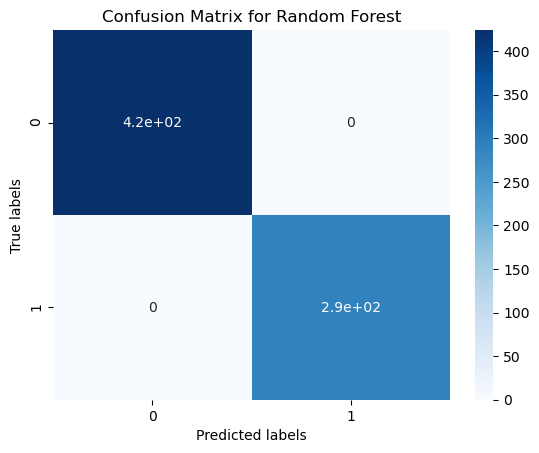

In [80]:
sns.heatmap(rf_cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Random Forest')
plt.show()